In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments') ,
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='7894',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/KUSHANK/OneDrive/Desktop/data analytics/Project DA/Dataset Project Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np 

db=mysql.connector.connect(host='localhost',
    user='root',
    password='7894',
    database='ecommerce')

cur=db.cursor()

# List all unique cities where customers are located.


In [2]:
query="""select distinct customer_city from customers"""

cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data)
df


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# Count the number of orders placed in 2017


In [3]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp)=2017 """

cur.execute(query)
data=cur.fetchall()

"total orders placed in 2017 are ",data[0][0]


('total orders placed in 2017 are ', 225505)

# Find the total sales per category.

In [4]:
query=""" select products.product_category category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category"""

cur.execute(query)
data=cur.fetchall()

#data
df=pd.DataFrame(data,columns=["Category","Sales"])
df

,Category,Sales
0,perfumery,10134773.20
1,Furniture Decoration,28603527.84
2,telephony,9737641.01
3,bed table bath,34251073.42
4,automotive,17045886.62
...,...,...
69,cds music dvds,23988.60
70,La Cuisine,58270.60
71,Fashion Children's Clothing,15713.40
72,PC Gamer,43488.60


# Calculate the percentage of orders that were paid in installments

In [5]:
query="""select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments"""

cur.execute(query)

data=cur.fetchall()
data


[(Decimal('99.9981'),)]

# Count the number of customers from each state

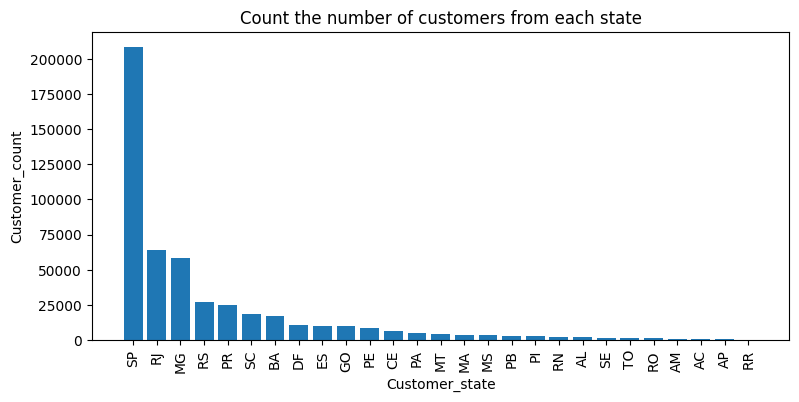

In [19]:
query="""select customer_state,count(customer_id) from customers 
group by customer_state"""

cur.execute(query)

data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["Customer_state","Customer_count"])
df=df.sort_values(by = "Customer_count", ascending= False)
plt.figure(figsize=(9,4))
plt.bar(df["Customer_state"],df["Customer_count"])
plt.xticks(rotation=90)
plt.xlabel("Customer_state")
plt.ylabel("Customer_count")
plt.title("Count the number of customers from each state")
plt.show()

# Calculate the number of orders per month in 2018

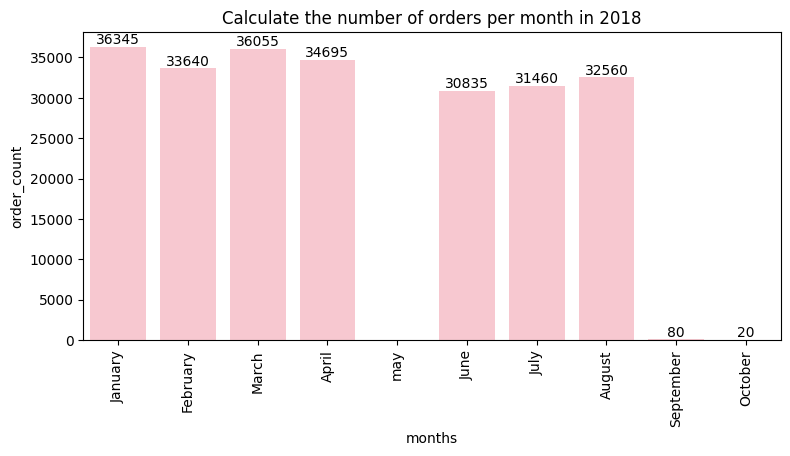

In [3]:
query=""" select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months """

cur.execute(query)

data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["months","order_count"])
o=["January","February","March","April","may","June","July","August","September","October"]
#df
plt.figure(figsize=(9,4))
ax=sns.barplot(x=df["months"],y=df["order_count"],data=df,order=o,color="Pink")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Calculate the number of orders per month in 2018")
plt.show()

# Find the average number of products per order, grouped by customer city

In [12]:
query=""" with count_per_order as (select orders.order_id,orders.customer_id,count(order_items.order_id) as oc 
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city """

cur.execute(query)

data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=[" customer city","average number of products per order"])
df

,customer city,average number of products per order
0,treze tilias,12.73
1,indaial,11.15
2,sao jose dos campos,11.38
3,sao paulo,11.56
4,porto alegre,11.75
...,...,...
4105,guairaca,20.00
4106,sambaiba,10.00
4107,japaratuba,10.00
4108,tuiuti,10.00


#  Calculate the percentage of total revenue contributed by each product category

In [33]:
query=""" select upper(products.product_category )category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments)) * 10 ,2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category order by sales desc"""

cur.execute(query)
data=cur.fetchall()

#data
df=pd.DataFrame(data,columns=["Category","Revenue"])
df

,Category,Revenue
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Identify the correlation between product price and the number of times a product has been purchased

In [48]:
query=""" select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by  products.product_category """

cur.execute(query)
data=cur.fetchall()

#data
df=pd.DataFrame(data,columns=["Category","Count_of_products","Avg_price"])
#df    
arr1=df["Count_of_products"]
arr2=df["Avg_price"]
a=np.corrcoef([arr1,arr2])
print("the correlation between product price and the number of times a product has been purchased is : ",a[0][1])

the correlation between product price and the number of times a product has been purchased is :  -0.10631514167157564


# Calculate the total revenue generated by each seller, and rank them by revenue.

In [65]:
query=""" select*, dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, round(sum(payments.payment_value),2) revenue 
from order_items join payments
on order_items.order_id=payments.order_id
group by  order_items.seller_id) as a """

cur.execute(query)
data=cur.fetchall()

#data
df=pd.DataFrame(data,columns=["Seller_ID","Revenue","Rank"])
df
#plt.bar(df["Seller_ID"],df["Revenue"])
#plt.show()  # show enormous data 

,Seller_ID,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,2028667.63,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,1232888.16,2
2,4a3ca9315b744ce9f8e9374361493884,1204981.08,3
3,1f50f920176fa81dab994f9023523100,1161013.68,4
4,53243585a1d6dc2643021fd1853d8905,1139612.32,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,76.84,3076
3091,702835e4b785b67a084280efca355756,74.24,3077
3092,4965a7002cca77301c82d3f91b82e1a9,65.44,3078
3093,77128dec4bec4878c37ab7d6169d6f26,60.88,3079


# Calculate the moving average of order values for each customer over their order history

In [7]:
query=""" select customer_id,order_purchase_timestamp,payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row ) as mov_avg
from 
(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment 
from payments join orders
on payments.order_id=orders.order_id) as a """


cur.execute(query)
data=cur.fetchall()

#data
df=pd.DataFrame(data,columns=["Customer_id","Timestamp","Payment","Moving_average"])
df
#plt.bar(df["Seller_ID"],df["Revenue"])
#plt.show()  # show enormous data

,Customer_id,Timestamp,Payment,Moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
1038855,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1038856,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1038857,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1038858,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


#  Calculate the cumulative sales per month for each year

In [13]:
query=""" select years,months,payment,sum(payment)
over (order by years,months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years ,
month(orders.order_purchase_timestamp) as months ,
round(sum(payments.payment_value),2) as payment
from orders join payments 
on orders.order_id=payments.order_id
group by years,months order by years,months) as  a  """


cur.execute(query)
data=cur.fetchall()

#data
df=pd.DataFrame(data,columns=["Years","Month","Sales","Cumulative_sales"])
df
#plt.bar(df["Seller_ID"],df["Revenue"])
#plt.show()  # show enormous data

,Years,Month,Sales,Cumulative_sales
0,2016,9,2522.40,2.522400e+03
1,2016,10,590904.80,5.934272e+05
2,2016,12,196.20,5.936234e+05
3,2017,1,1384880.40,1.978504e+06
4,2017,2,2919080.10,4.897584e+06
5,2017,3,4498636.00,9.396220e+06
6,2017,4,4177880.29,1.357410e+07
7,2017,5,5929188.20,1.950329e+07
8,2017,6,5112763.80,2.461605e+07
9,2017,7,5923829.19,3.053988e+07


#  Calculate the year-over-year growth rate of total sales

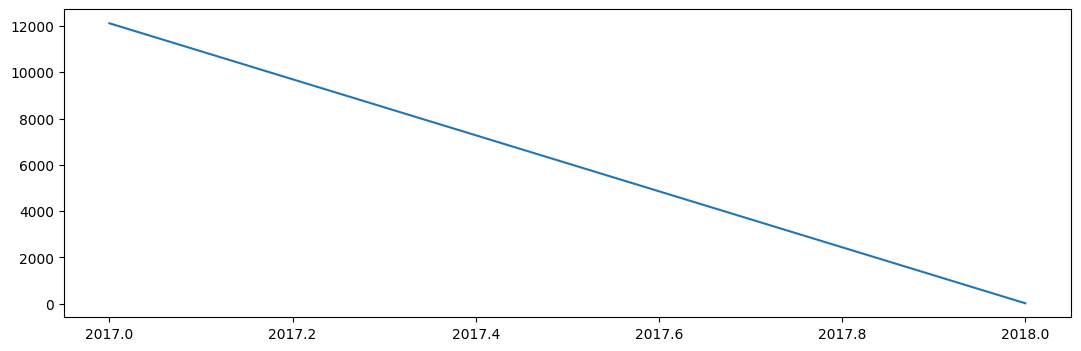

In [33]:
query=""" with a as 
(select year(orders.order_purchase_timestamp) as years ,
round(sum(payments.payment_value),2) as payment
from orders join payments 
on orders.order_id=payments.order_id
group by years order by years) 

select years ,( payment-lag(payment,1)over(order by years))/lag(payment,1)over(order by years)*100 from a """


cur.execute(query)
data=cur.fetchall()

#data
df=pd.DataFrame(data,columns=["Years","Yoy % growth"])
df
plt.figure(figsize=(13,4))
plt.plot(df["Years"],df["Yoy % growth"])

plt.show()  # show enormous data

# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [46]:
query=""" with a as (select customers.customer_id ,
min(orders.order_purchase_timestamp) first_order
from customers join orders 
on customers.customer_id = orders.customer_id
group by customers.customer_id) , 

b as (select a.customer_id,count(distinct orders.order_purchase_timestamp) next_order 
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id=b.customer_id"""


cur.execute(query)
data=cur.fetchall()

data
#df=pd.DataFrame(data,columns=["Years","Yoy % growth"])
#df

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

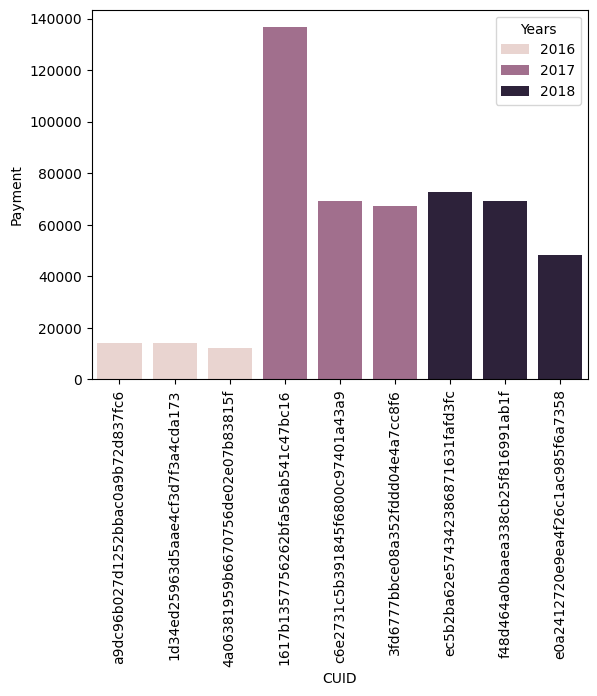

In [55]:
query="""select years ,customer_id , payment , d_rank
from 
(SELECT year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp) order by (sum(payments.payment_value)) desc) d_rank
from orders join payments 
on payments.order_id= orders.order_id
group by year(orders.order_purchase_timestamp),orders.customer_id ) as a
where d_rank<=3 ;   """

cur.execute(query)
data=cur.fetchall()

#data
df=pd.DataFrame(data,columns=["Years","CUID","Payment", "Rank"])
df
sns.barplot(x="CUID",y="Payment",data =df , hue ="Years")
plt.xticks(rotation = 90 )
plt.show()            